In [39]:
#数据加载
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [33]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    return data[:,:2], data[:,-1]

In [34]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.3)

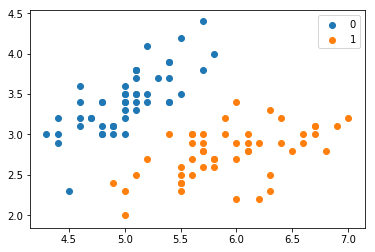

In [35]:
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()
plt.show()

In [44]:
class maxEntropyModel():
    def __init__(self):
        self.M=1
        self.N=0 #样本数
        self.ySet=set()
        self.f={}
        self.xCount={}
        self.Ep_=None
        self.Ep=None
        self.w=None


    def fit(self,Xtrain,ytrain):
        self.initParams(Xtrain,ytrain)
        while True:
            for x in Xtrain:
                self.calcEp(x)
            delta = 1 / self.M * np.log(np.divide(self.Ep_, self.Ep))
            newW=self.w+delta
            if np.linalg.norm(newW-self.w)<1e-2:
                break
            self.w=newW
        print("w:",self.w)
        print("fit complete!")



    def initParams(self,Xtrain,ytrain):
        N=len(Xtrain)  #样本数
        self.N=N

        for i in range(N):
            self.ySet.add(ytrain[i])
            for x in Xtrain[i]:
                if x not in self.xCount.keys():
                    self.xCount[x]=1
                else:
                    self.xCount[x]+=1
                if (x,ytrain[i]) not in self.f.keys():
                    self.f[(x,ytrain[i])]=1
                else:
                    self.f[(x, ytrain[i])] += 1

        M=len(self.f)
        self.w=np.zeros((M,1))
        self.M = M
        self.Ep_=np.zeros((M,1))
        self.Ep = np.zeros((M, 1))
        for i,v in enumerate(self.f):
            self.Ep_[i]=self.f[v]/N



    def calcEp(self,feature):
        for i,v in enumerate(self.f):
            for f in feature:
                probs=self.calcPy_x(f)
                for prob,label in probs:
                    if (f,label)==v:
                        self.Ep[i]+=(self.xCount[f]/self.N)*prob



    def calcPy_x(self,feature):  #计算P(y|x)
        wgts=[(self.calcZw(feature,y),y) for y in self.ySet]
        Zw=sum([wgt for wgt,y in wgts])
        probs=[(wgt/Zw,y) for wgt,y in wgts]
        return probs


    def calcZw(self,feat,label):  #计算Zw
        wgt=0
        for i,v in enumerate(self.f):
            if (feat,label)==v:
                wgt+=self.w[i]
        return math.exp(wgt)


In [ ]:
ME=maxEntropyModel()
ME.fit(X_train,y_train)